# Folding Influence
Here we will test the influence the folding mechanism has on lift generation

In [2]:
import matplotlib.pyplot as plt
from utils import *
import numpy as np
import plotly.express as px
import pandas as pd
from scipy.signal import find_peaks
from scipy.interpolate import interp1d

In [5]:
!python -m serial.tools.list_ports
daq_port = '/dev/ttyUSB0'
command_port = "/dev/ttyACM0"

/dev/ttyUSB0        
1 ports found


## Calibration
First we calibrate

In [6]:
measurements = read_measurements_df_6axis(port=daq_port, duration=5)
measurements['Time'] = 0
calib = measurements.mean()
calib.to_csv('/home/anuarsantoyo/PycharmProjects/Batbot/analysis/folding_influence/data/calib_bat.csv')

In [7]:
# Different calibrations done for the initial and corrected experiment.
calib = pd.read_csv('/home/anuarsantoyo/PycharmProjects/Batbot/analysis/folding_influence/data/calib_bat.csv', index_col=0).iloc[:,0]

In [137]:
measurements = read_measurements_df_6axis(port=daq_port, duration=5) - calib

## Measurements

In [31]:
folding, _ = peak_slice_interpolate(measurements_folding)
extended, _ = peak_slice_interpolate(measurements_extended)

<Axes: xlabel='Time'>

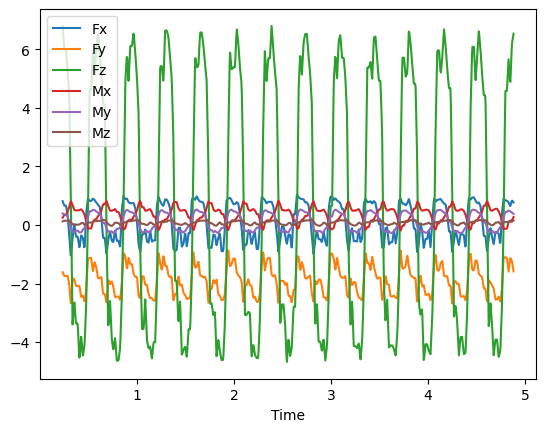

In [32]:
folding.plot(x='Time')

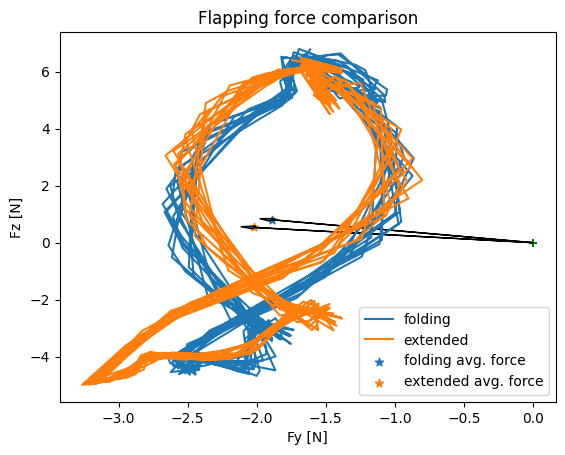

In [33]:
plt.scatter(0, 0, c='g', marker='+')

plt.plot(folding.Fy,folding.Fz, label=f'folding')
plt.plot(extended.Fy,extended.Fz, label=f'extended')

Fz, Fy = folding.mean()[['Fz', 'Fy']]
plt.scatter(Fy, Fz, marker='*', label='folding avg. force')
plt.arrow(0, 0, Fy, Fz, head_width=0.1, head_length=0.1)
Fz, Fy = extended.mean()[['Fz', 'Fy']]
plt.scatter(Fy, Fz, marker='*', label='extended avg. force')
plt.arrow(0, 0, Fy, Fz, head_width=0.1, head_length=0.1)
plt.ylabel('Fz [N]')
plt.xlabel('Fy [N]')
plt.legend()
plt.title('Flapping force comparison')
plt.show()

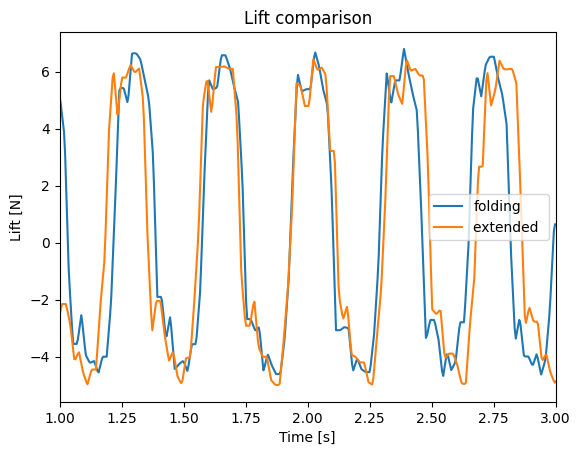

In [35]:
plt.plot(folding.Time,folding.Fz, label=f'folding')
plt.plot(extended.Time,extended.Fz, label=f'extended ')
plt.legend()
plt.xlim(1,3)
plt.ylabel('Lift [N]')
plt.xlabel('Time [s]')
plt.title('Lift comparison')
plt.show()

In [36]:
folding_mean = folding.mean()[['Fy', 'Fz']]

extended_mean = extended.mean()[['Fy', 'Fz']]


df_means = pd.DataFrame({
    'extended mean': extended_mean,
    'folding mean': folding_mean
})
df_means

,extended mean,folding mean
Fy,-2.01889,-1.886713
Fz,0.53495,0.803450


## Paper Plot

In [158]:
extended_10 = pd.read_csv('/home/anuarsantoyo/PycharmProjects/Batbot/analysis/folding_influence/data/extended_10.csv')  + calib  - calib2
extended_10_5 = pd.read_csv('/home/anuarsantoyo/PycharmProjects/Batbot/analysis/folding_influence/data/extended_10,5.csv') + calib - calib2
extended_11 = pd.read_csv('/home/anuarsantoyo/PycharmProjects/Batbot/analysis/folding_influence/data/extended_11.csv') + calib - calib2
extended_11_5 = pd.read_csv('/home/anuarsantoyo/PycharmProjects/Batbot/analysis/folding_influence/data/extended_11,5.csv') + calib - calib2
extended_12 = pd.read_csv('/home/anuarsantoyo/PycharmProjects/Batbot/analysis/folding_influence/data/extended_12.csv') + calib - calib2
folding_10 = pd.read_csv('/home/anuarsantoyo/PycharmProjects/Batbot/analysis/folding_influence/data/folding_10.csv') + calib - calib2
folding_10_5 = pd.read_csv('/home/anuarsantoyo/PycharmProjects/Batbot/analysis/folding_influence/data/folding_10,5.csv') + calib - calib2
folding_11 = pd.read_csv('/home/anuarsantoyo/PycharmProjects/Batbot/analysis/folding_influence/data/folding_11.csv') + calib - calib2
folding_11_5 = pd.read_csv('/home/anuarsantoyo/PycharmProjects/Batbot/analysis/folding_influence/data/folding_11,5.csv') + calib - calib2
folding_12 = pd.read_csv('/home/anuarsantoyo/PycharmProjects/Batbot/analysis/folding_influence/data/folding_12.csv') + calib - calib2

extended_10 = peak_slice_interpolate(extended_10)[0][['Time', 'Fz']]
extended_10_5 = peak_slice_interpolate(extended_10_5)[0][['Time', 'Fz']]
extended_11 = peak_slice_interpolate(extended_11)[0][['Time', 'Fz']]
extended_11_5 = peak_slice_interpolate(extended_11_5)[0][['Time', 'Fz']]
extended_12 = peak_slice_interpolate(extended_12)[0][['Time', 'Fz']]
folding_10 = peak_slice_interpolate(folding_10)[0][['Time', 'Fz']]
folding_10_5 = peak_slice_interpolate(folding_10_5)[0][['Time', 'Fz']]
folding_11 = peak_slice_interpolate(folding_11)[0][['Time', 'Fz']]
folding_11_5 = peak_slice_interpolate(folding_11_5)[0][['Time', 'Fz']]
folding_12 = peak_slice_interpolate(folding_12)[0][['Time', 'Fz']]

extendeds = [extended_10, extended_10_5, extended_11, extended_11_5, extended_12]
extendeds = [x - x.Time.min() for x in extendeds]

foldeds = [folding_10, folding_10_5, folding_11, folding_11_5, folding_12] 
foldeds = [x - x.Time.min() for x in foldeds]

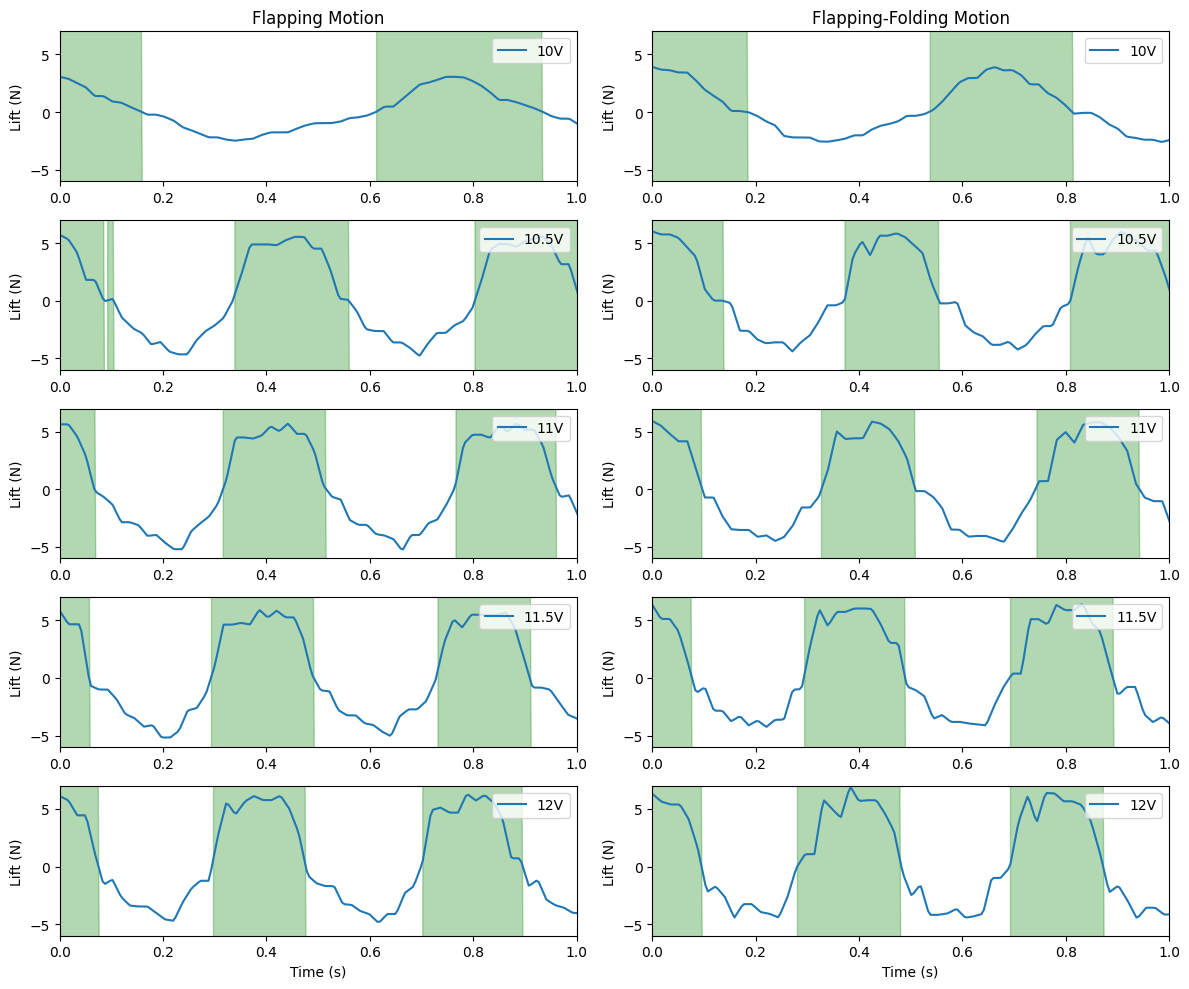

In [186]:
import matplotlib.pyplot as plt
import numpy as np

# Create a figure with 6 subplots arranged in 2x3
fig, axs = plt.subplots(5, 2, figsize=(12,10), sharex=False, sharey=False)

# Plot each time series with green fill for positive values
for i, label in enumerate(['10V', '10.5V', '11V', '11.5V', '12V']):
    axs[i][0].plot(extendeds[i].Time, extendeds[i].Fz, linestyle= 'solid', label=label)
    axs[i][0].fill_between(extendeds[i].Time, -20, 20, where=(extendeds[i].Fz > 0), interpolate=True, color='green', alpha=0.3)
    axs[i][0].set_ylabel('Lift (N)')
    axs[i][0].set_ylim(-6,7)
    axs[i][0].set_xlim(0,1)
    axs[i][0].legend(loc='upper right')

    axs[i][1].plot(foldeds[i].Time, foldeds[i].Fz, linestyle= 'solid', label=label)
    axs[i][1].fill_between(foldeds[i].Time, -20, 20, where=(foldeds[i].Fz > 0), interpolate=True, color='green', alpha=0.3)
    axs[i][1].set_ylabel('Lift (N)')
    axs[i][1].set_ylim(-6,7)
    axs[i][1].set_xlim(0,1)
    axs[i][1].legend(loc='upper right')
    
    
axs[4][0].set_xlabel('Time (s)')
axs[4][1].set_xlabel('Time (s)')
axs[0][0].set_title('Flapping Motion')
axs[0][1].set_title('Flapping-Folding Motion')

# Adjust layout
plt.tight_layout()

# Save the figuree
#plt.savefig('/mnt/data/time_series_plots.png')
plt.show()


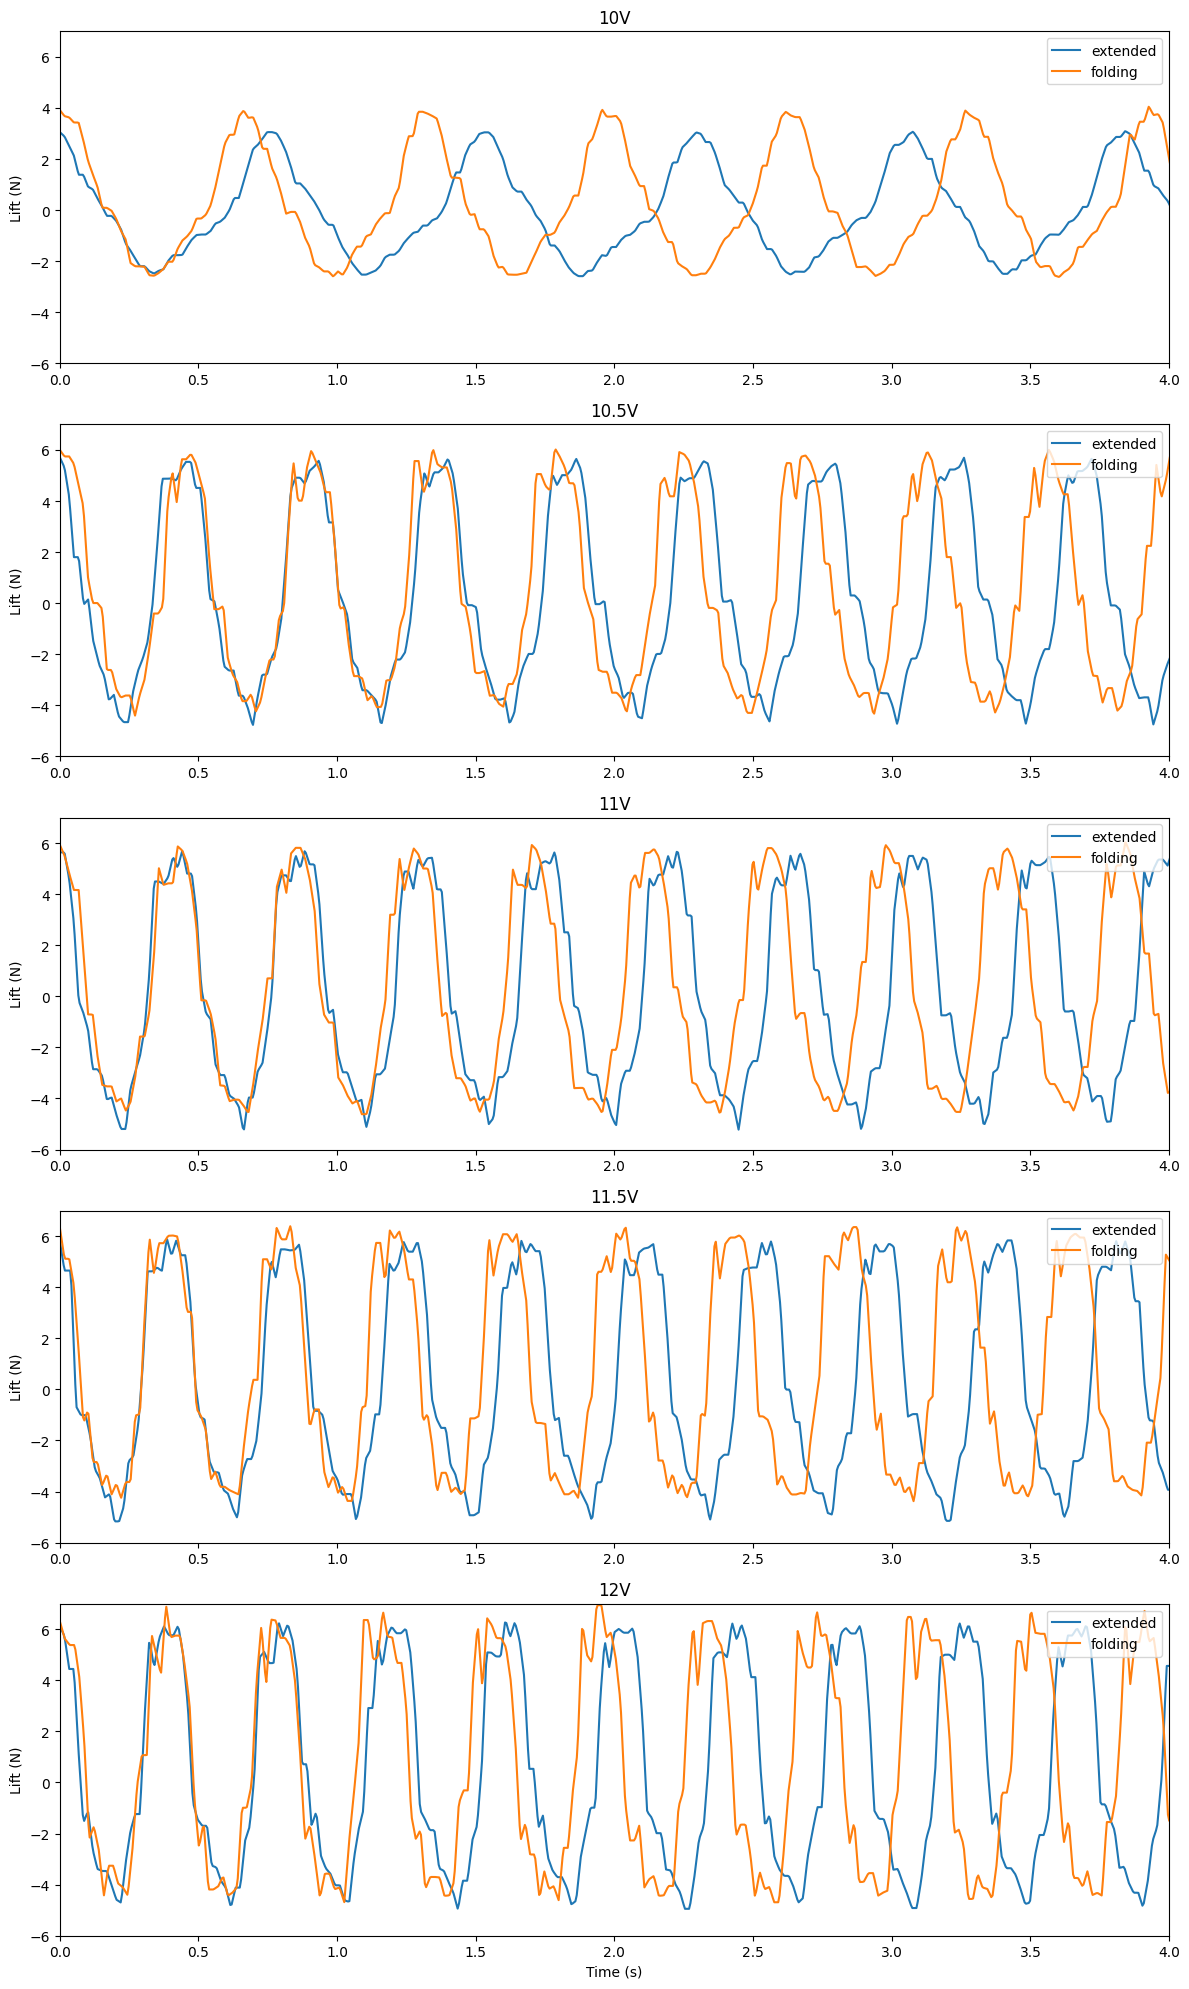

In [175]:
import matplotlib.pyplot as plt
import numpy as np

# Create a figure with 6 subplots arranged in 2x3
fig, axs = plt.subplots(5, 1, figsize=(12, 20), sharex=False, sharey=False)

# Plot each time series with green fill for positive values
for i, label in enumerate(['10V', '10.5V', '11V', '11.5V', '12V']):
    axs[i].plot(extendeds[i].Time, extendeds[i].Fz, linestyle= 'solid', label='extended')
    #axs[i].fill_between(extendeds[i].Time, -20, 20, where=(extendeds[i].Fz > 0), interpolate=True, color='green', alpha=0.3)
    axs[i].set_ylabel('Lift (N)')
    axs[i].set_ylim(-6,7)
    axs[i].set_xlim(0,4)
    axs[i].set_title(label)
    axs[i].plot(foldeds[i].Time, foldeds[i].Fz, linestyle= 'solid', label='folding')
    #axs[i].fill_between(foldeds[i].Time, -20, 20, where=(foldeds[i].Fz > 0), interpolate=True, color='green', alpha=0.3)
    axs[i].legend(loc='upper right')
    
    
axs[4].set_xlabel('Time (s)')
# Adjust layout
plt.tight_layout()

# Save the figuree
#plt.savefig('/mnt/data/time_series_plots.png')
plt.show()